In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:

file_path = 'heart_failure_clinical_records_dataset  original.csv'
heart_data = pd.read_csv(file_path, delimiter=';')

print("Total data dalam dataset:", len(heart_data))
print("\nInformasi dataset:")
print(heart_data.info())

print("\nLima data pertama:")
print(heart_data.head())

print("\nMemeriksa missing value:")
print(heart_data.isnull().sum())

print("\nPersentase missing value:")
print((heart_data.isnull().sum() / len(heart_data)) * 100, "%")

Total data dalam dataset: 299

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 1 columns):
 #   Column                                                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                                                     --------------  ----- 
 0   age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Risk_Outcome  299 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB
None

Lima data pertama:
  age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Risk_Outcome
0             75,0,582,0,20,1,265000,1.9,130,1,0,4,1                        

In [11]:

file_path = 'heart_failure_clinical_records_dataset  original.csv'
# Ganti delimiter menjadi ',' jika kolom dipisahkan dengan koma
heart_data = pd.read_csv(file_path, delimiter=',')

# Periksa kolom dalam DataFrame
print("Kolom dalam dataset:", heart_data.columns.tolist())

# Lanjutkan hanya jika 'Risk_Outcome' ada dalam kolom
if 'Risk_Outcome' in heart_data.columns:
    features = heart_data.drop(columns=['Risk_Outcome'])
    target = heart_data['Risk_Outcome']

    print("\nFitur:")
    print(features.head())
    print("\nTarget:")
    print(target.head())
else:
    print("Error: Kolom 'Risk_Outcome' tidak ditemukan dalam dataset.")

Kolom dalam dataset: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'Risk_Outcome']

Fitur:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000

In [13]:

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)


normalized_data = pd.DataFrame(normalized_features, columns=features.columns)
normalized_data['Risk_Outcome'] = target


print(normalized_data.head())

normalized_data.to_excel('heart_failure_Normalized_data.xlsx', index=False, sheet_name='Normalisasi Data')

        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  0.636364      0.0                  0.071319       0.0           0.090909   
1  0.272727      0.0                  1.000000       0.0           0.363636   
2  0.454545      0.0                  0.015693       0.0           0.090909   
3  0.181818      1.0                  0.011227       0.0           0.090909   
4  0.454545      1.0                  0.017479       1.0           0.090909   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                  1.0   0.290823          0.157303      0.485714  1.0   
1                  0.0   0.288833          0.067416      0.657143  1.0   
2                  0.0   0.165960          0.089888      0.457143  1.0   
3                  0.0   0.224148          0.157303      0.685714  1.0   
4                  0.0   0.365984          0.247191      0.085714  0.0   

   smoking      time  Risk_Outcome  
0      0.0  0.000000             1  
1     

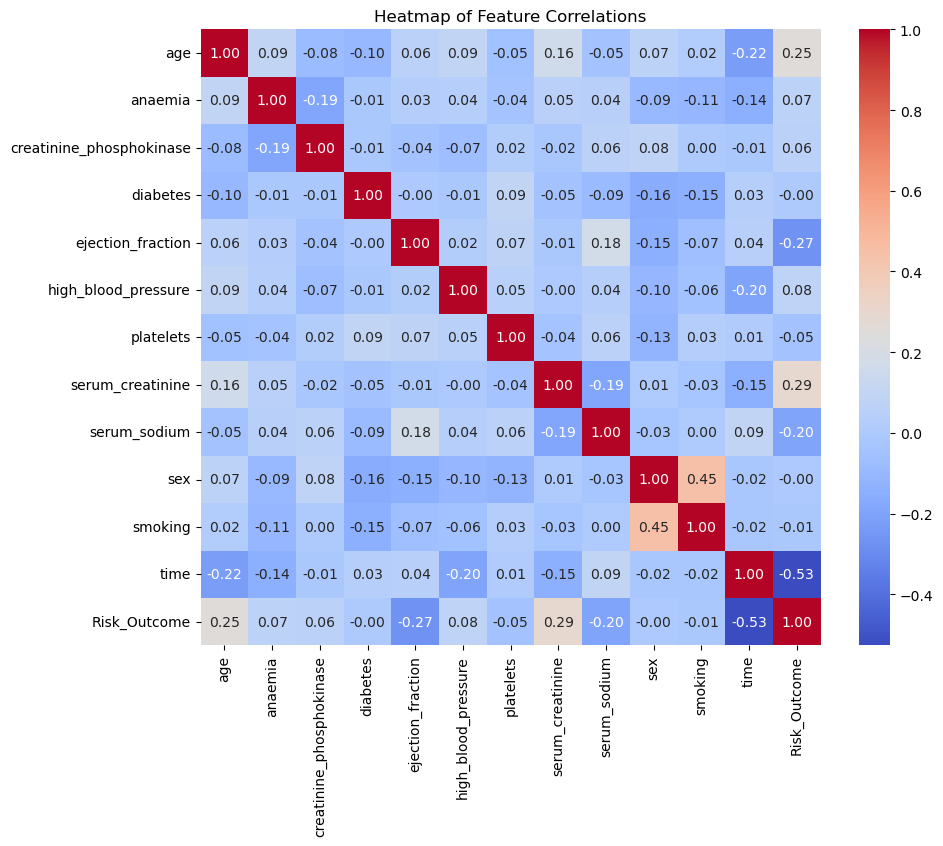

In [6]:
# Load the dataset with the correct delimiter
file_path = 'heart_failure_clinical_records_dataset  original.csv'  # Ganti dengan lokasi dataset Anda
data = pd.read_csv(file_path, delimiter=';')

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Feature Correlations")
plt.show()


In [7]:

# Langkah 5: Membagi data menjadi set pelatihan dan pengujian
train_data, test_data = train_test_split(normalized_data, test_size=0.2, random_state=42)

# Ekspor set pelatihan dan pengujian ke file Excel terpisah
train_data.to_excel('heart_failure_train_data.xlsx', index=False, sheet_name='Train Data')
test_data.to_excel('heart_failure_test_data.xlsx', index=False, sheet_name='Test Data')
print("\nData pelatihan dan pengujian telah diekspor ke file Excel terpisah.")


Data pelatihan dan pengujian telah diekspor ke file Excel terpisah.


Accuracy: 0.6833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78        35
           1       0.88      0.28      0.42        25

    accuracy                           0.68        60
   macro avg       0.76      0.63      0.60        60
weighted avg       0.75      0.68      0.63        60

Confusion Matrix:



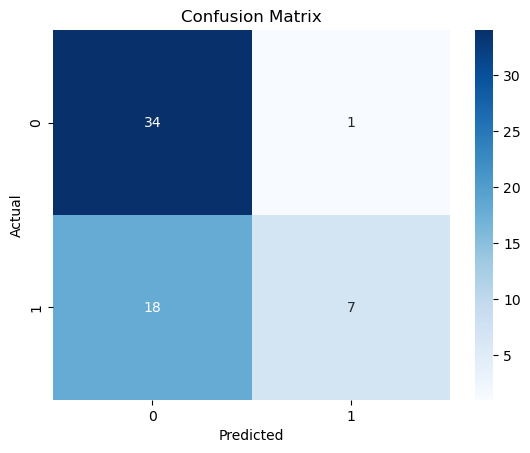

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Langkah 1: Pisahkan fitur dan target untuk data pelatihan dan pengujian
X_train = train_data.drop(columns=['Risk_Outcome'])
y_train = train_data['Risk_Outcome']
X_test = test_data.drop(columns=['Risk_Outcome'])
y_test = test_data['Risk_Outcome']

# Langkah 2: Inisialisasi model KNN dengan k yang dipilih 
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)

# Langkah 3: Latih model pada data pelatihan
knn_model.fit(X_train, y_train)

# Langkah 4: Buat prediksi pada data uji
y_pred = knn_model.predict(X_test)

# Langkah 5: Mengevaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
# Visualisasi Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




Accuracy: 0.5833333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.94      0.73        35
           1       0.50      0.08      0.14        25

    accuracy                           0.58        60
   macro avg       0.54      0.51      0.43        60
weighted avg       0.55      0.58      0.48        60

Confusion Matrix:



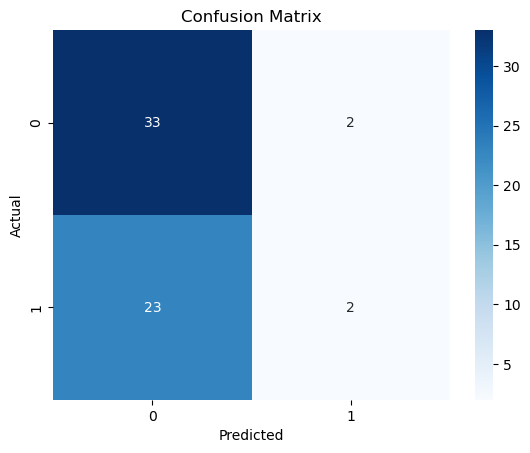

In [10]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

# Langkah 3: Latih model pada data pelatihan
knn_model.fit(X_train, y_train)

# Langkah 4: Buat prediksi pada data uji
y_pred = knn_model.predict(X_test)

# Langkah 5: Mengevaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
# Visualisasi Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.5833333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.94      0.73        35
           1       0.50      0.08      0.14        25

    accuracy                           0.58        60
   macro avg       0.54      0.51      0.43        60
weighted avg       0.55      0.58      0.48        60

Confusion Matrix:



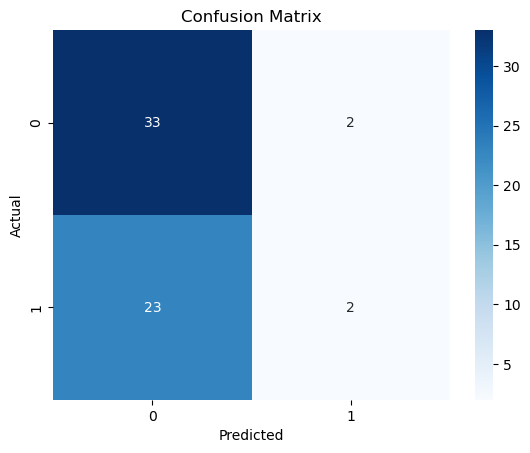

In [13]:
k = 7
knn_model = KNeighborsClassifier(n_neighbors=k)

# Langkah 3: Latih model pada data pelatihan
knn_model.fit(X_train, y_train)

# Langkah 4: Buat prediksi pada data uji
y_pred = knn_model.predict(X_test)

# Langkah 5: Mengevaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
# Visualisasi Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Cross-Validation Scores: [0.6875     0.70833333 0.6875     0.70833333 0.70212766]
Mean CV Score: 0.698758865248227


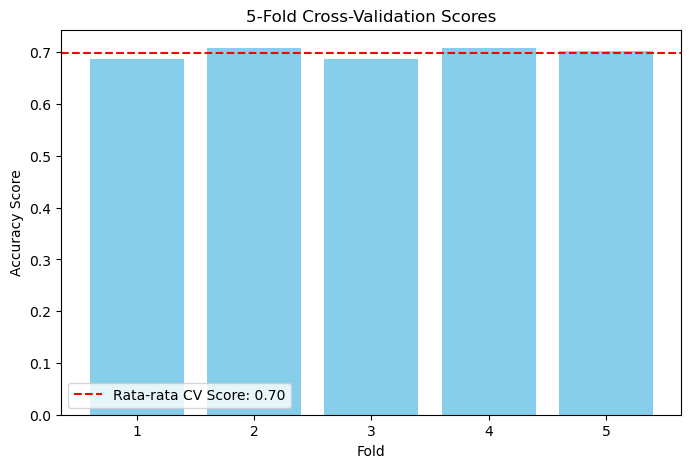

In [15]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

fold = 5
# 3-fold cross-validation
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=fold)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Visualisasi 1: Bar Plot Cross-Validation Scores
plt.figure(figsize=(8, 5))
plt.bar(range(1, fold+1), cv_scores, color='skyblue') 
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Rata-rata CV Score: {cv_scores.mean():.2f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.title(f'{fold}-Fold Cross-Validation Scores')
plt.legend()
plt.show()


Logistic Regression Accuracy: 0.7166666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.97      0.80        35
           1       0.90      0.36      0.51        25

    accuracy                           0.72        60
   macro avg       0.79      0.67      0.66        60
weighted avg       0.77      0.72      0.68        60

Confusion Matrix:



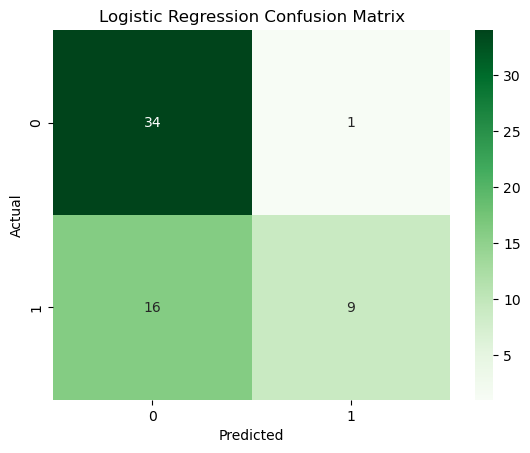

Random Forest Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

Confusion Matrix:



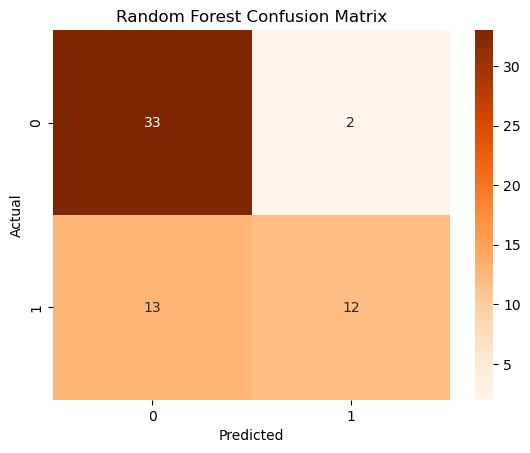

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Langkah 1: Pisahkan fitur dan target untuk data pelatihan dan pengujian
X_train = train_data.drop(columns=['Risk_Outcome'])
y_train = train_data['Risk_Outcome']
X_test = test_data.drop(columns=['Risk_Outcome'])
y_test = test_data['Risk_Outcome']

# ---------------------- Model 1: Logistic Regression ----------------------
# Inisialisasi model Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
# Latih model
log_reg_model.fit(X_train, y_train)
# Prediksi
y_pred_log = log_reg_model.predict(X_test)
# Evaluasi
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n")
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Greens")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------- Model 2: Random Forest ----------------------
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Latih model
rf_model.fit(X_train, y_train)
# Prediksi
y_pred_rf = rf_model.predict(X_test)
# Evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Oranges")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
